# Flood - Visualize GRACE Features Post Flood
<h3> 
Aaron Trefler <br/>
JPL <br/>
Created: 06/29/2016 <br/>
</h3>

# I. Setup

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io as sio 

from flood_functions import plot_grace_feature_histogram
from IPython.display import display, HTML
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
%pylab inline
# %matplotlib

Populating the interactive namespace from numpy and matplotlib


In [3]:
# define directories
dir_flood = '../../Raw Data/Flood Observatory/'
dir_python_data = '../Data/'
dir_grace = '../../Work_Matlab/Data/'
dir_figures = '../Figures/'

# II. Load Data

## GRACE

In [4]:
# unpickle grace land mask
f = open(dir_python_data + 'grace_land_mask.p')
grace_land_mask = pickle.load(f)
f.close()

In [5]:
# unpickle grace features
f = open(dir_python_data + 'grace_features.p')
[
    grace_lwe,
    grace_lwe_norm,
    grace_lwe_clim_norm,
    grace_lwe_noClim_norm,
    grace_lwe_rank,
    grace_lwe_rank_norm,
    grace_lwe_clim_rank,
    grace_lwe_clim_rank_norm,
    grace_lwe_noClim_rank,
    grace_lwe_noClim_rank_norm] = pickle.load(f)
f.close()

## Flood Observatory

In [6]:
# name of preprocessed flood dataframe
df_name = 'df_flood_grace_time_location_features'

In [7]:
# FO data previously cleaned by FloodObservatory_Preprocess.py
df_flood_grace = pd.read_csv(dir_python_data + df_name + '.csv')
df_flood_grace = df_flood_grace.drop('Unnamed: 0', axis=1)
df_flood_grace.tail(1)

,Register #,Began,Date Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity *,Affected sq km,...,GRACE lwe post,GRACE lwe norm post,GRACE lwe clim norm post,GRACE lwe noClim norm post,GRACE lwe rank post,GRACE lwe rank norm post,GRACE lwe clim rank post,GRACE lwe clim rank norm post,GRACE lwe noClim rank post,GRACE lwe noClim rank norm post
2228,1905.0,17-Apr-02,17-Apr-02,19-Apr-02,3.0,4.0,0.0,Heavy rain,1.0,919.174,...,8.324445,1.261944,1.924201,0.19343,138.0,1.397006,12.0,1.589769,98.0,0.488384


### Remove Floods With No Associated Post-MASCON

In [8]:
df_flood_grace = df_flood_grace[pd.notnull(df_flood_grace['Post MASCON Index'])]

In [9]:
shape(df_flood_grace)

(2208, 41)

# III. Visualization

In [10]:
# visualization variables
tps = shape(grace_lwe)[2]
df = df_flood_grace

## (2) Time Mapping for Flood Events

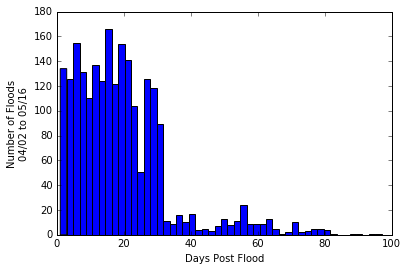

In [11]:
# plot histogram of differences b/w flood and GRACE-MASCON dates
plt.hist(df['Post MASCON Diff-Days'], bins=50)
plt.ylabel('Number of Floods\n04/02 to 05/16')
plt.xlabel('Days Post Flood')
plt.savefig(dir_figures + 'floods_time_daysPostMascon.png')
plt.show()

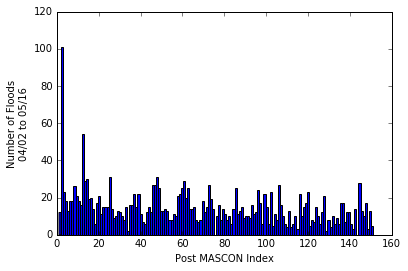

In [12]:
# plot histogram of GRACE MASCON time indexes of floods
plt.hist(df['Post MASCON Index'], bins = tps)
plt.ylabel('Number of Floods\n04/02 to 05/16')
plt.xlabel('Post MASCON Index')
plt.savefig(dir_figures + 'floods_time_mappedMasconIndex.png')
plt.show()

## (4) GRACE Post LWE for Flood Events

### (4a) Numerical Features (un-ranked)

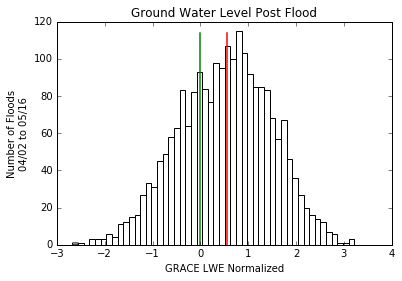

In [13]:
plot_grace_feature_histogram('GRACE LWE Normalized', df['GRACE lwe norm post'],\
                            title='Ground Water Level Post Flood')

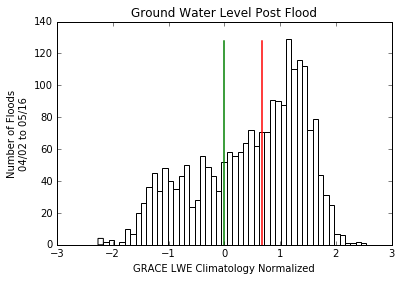

In [19]:
plot_grace_feature_histogram('GRACE LWE Climatology Normalized', df['GRACE lwe clim norm post'],\
                            title='Ground Water Level Post Flood')

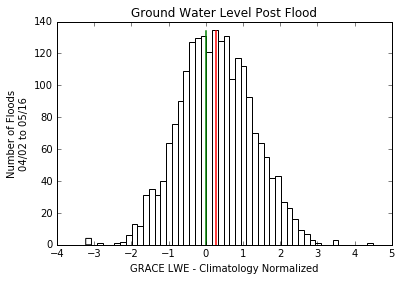

In [14]:
plot_grace_feature_histogram('GRACE LWE - Climatology Normalized', df['GRACE lwe noClim norm post'],\
                            title='Ground Water Level Post Flood')

### (4b) Ordinal Features (ranked)

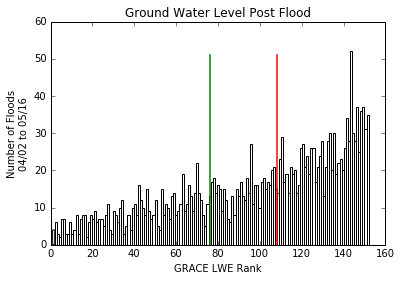

In [15]:
plot_grace_feature_histogram('GRACE LWE Rank', df['GRACE lwe rank post'],\
                             title='Ground Water Level Post Flood',\
                             num_bins=152, middle_value=76)

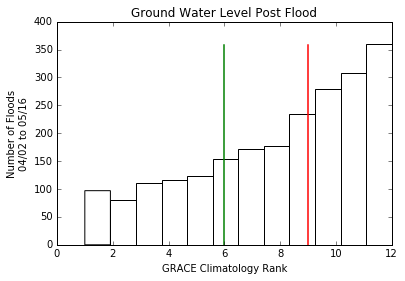

In [17]:
plot_grace_feature_histogram('GRACE Climatology Rank', df['GRACE lwe clim rank post'],\
                             title='Ground Water Level Post Flood',\
                             num_bins=12, middle_value=6)

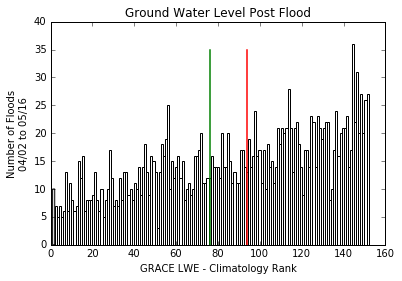

In [18]:
plot_grace_feature_histogram('GRACE LWE - Climatology Rank', df['GRACE lwe noClim rank post'],\
                             title='Ground Water Level Post Flood',\
                             num_bins=152, middle_value=76)